# Support Vector Machines

### Linear SVM Classification

A Support Vector Machine (SVM) is capable of performing linear or nonlinear classification, regression, and even outlier detection.  SVMs are particularly well suited for classification of complex small or medium sized datasets. <br>

You can think of an SVM classifier as fitting the widest possible street between the classes.  This is called <i> large margin classification </i>.  The decision boundary is fully determined by the instances located on the edge of the street.  These instances are called the <i> support vectors </i>.  <br>

<b> SVMs are sensitive to the feature scales </b> <br>

If we strictly impose that all instances must be off the street and on the right side, this is called <i> hard margin classification. </i> <br>

Two main issues with hard margin classification <br>
1. It only works if the data is linearly separable.
2. It is senstive to outliers
<br>

The objective in avoiding these issues is to find a good balance between keeping the street as large as possible and limiting the <i> margin violations. </i>  This is called <i> soft margin classification </i> <br>

When creating an SVM model using Scikit-Learn we can specify a number of hyperparameters.  <b> C </b> is one of those hyperparameters.  If we set it to a low value (1), then we end up with the model that has more margin violations.  If we set it to a high value (100) we get a model with fewer margin violations.
>- If your SVM model is overfitting, you can try regularizing it by reducing C.

#### Example 1.0: Detect Iris Virginica flowers

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Load the dataset
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
# Determine features and targets
iris.get('feature_names'), iris.get('target_names')

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [3]:
# Features will be petal length (cm) and petal width (cm).  Target will be virginica.  Convert the targets to binary
X = iris.get('data')[:, (2,3)]
y = (iris.get('target') == 2).astype(np.float64) 

svm_clf_ = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf_.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
# Make a prediction
svm_clf_.predict([[5.5, 1.7]])

array([1.])

Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class. <br>

Instead of using the LinearSVC class we could use the SVC class with a linear kernel.  When creating the SVC model, we would write SVC(kernel='linear', C=1).  The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean.  This is automatic if you scale the data using the StandardScaler.  Also, make sure you set the loss hyperparameter to 'hinge', as it is not the default value.  Finally, for better performance, you should set the dual hyperparameter to False, unless there are more features than training instances (this will be discussed in more detail later.)

### Nonlinear SVM Classification

Many datasets are not even close to being linearly separable.  One approach to handling nonlinear datasets is to add more features, such as polynomial features. <br>

To implement this idea using Scikit-Learn, create a Pipeline containing a PolynomialFeatures transformer, followed by a StandardScaler and LinearSVC.

#### Example 2.0: Making a dataset linearly separable

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)

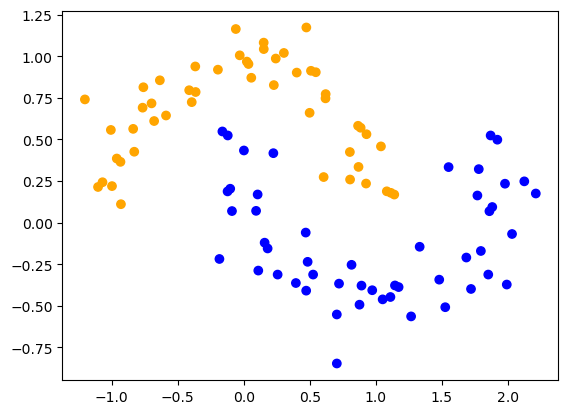

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

In [7]:
poly_X = PolynomialFeatures(degree=3).fit_transform(X)

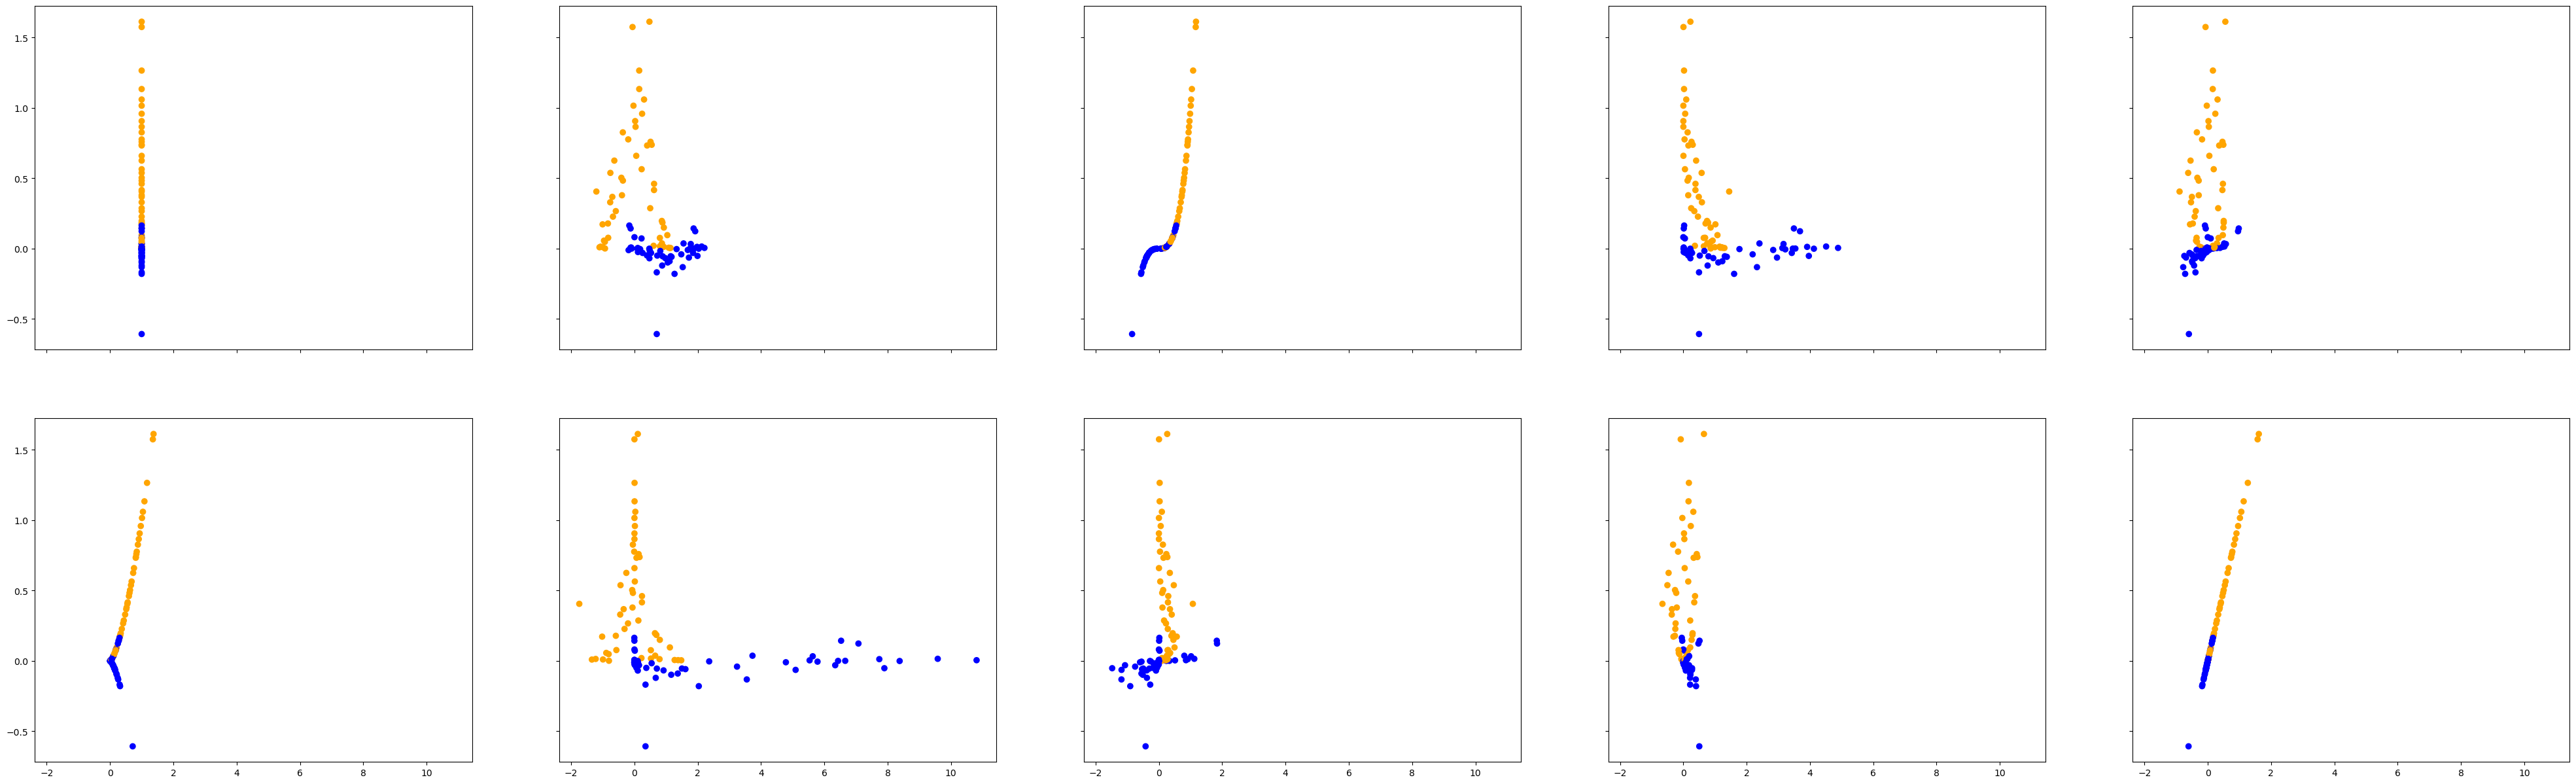

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True, sharex=True, figsize=(50, 15))#, subplot_kw=dict(projection='3d'))

n = 0
for row in ax:
    for col in row:
        col.scatter(poly_X[:, n], poly_X[:, 9], c=y, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))
        n += 1


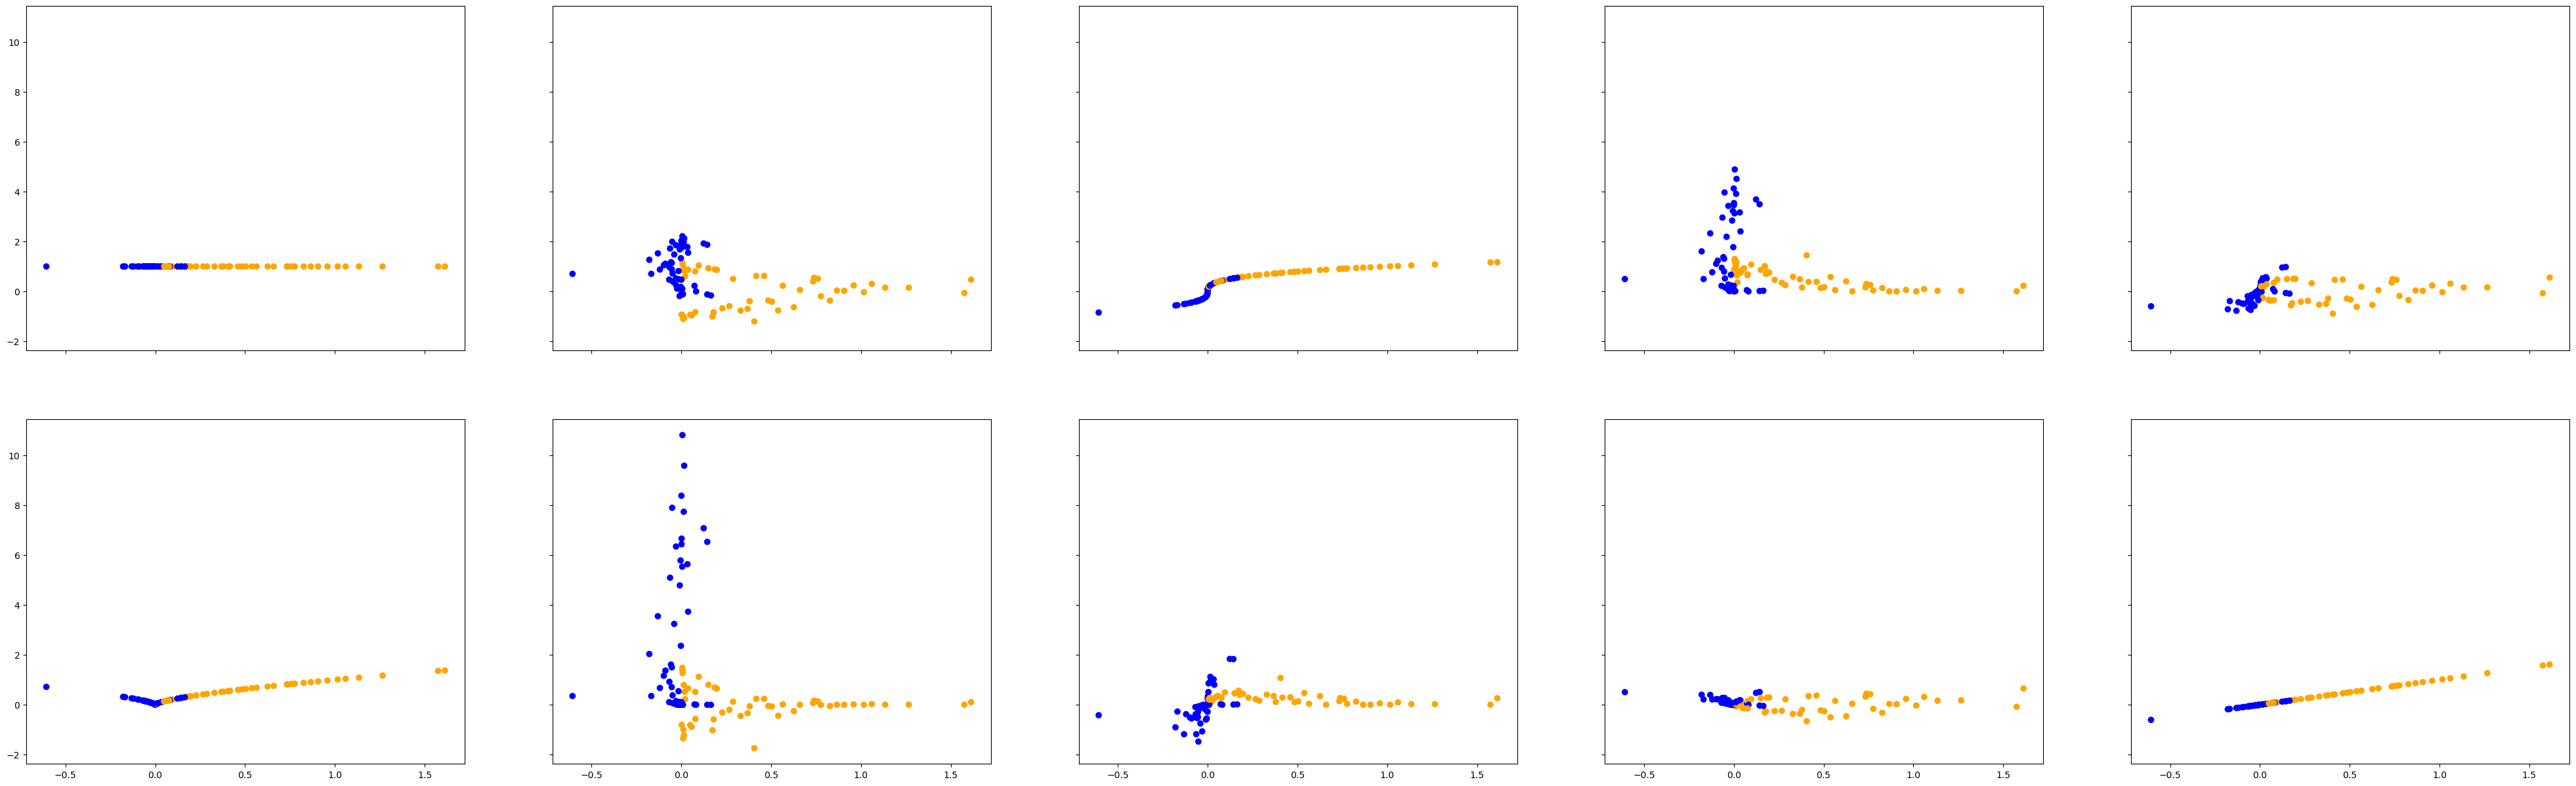

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True, sharex=True, figsize=(50, 15))#, subplot_kw=dict(projection='3d'))

n = 0
for row in ax:
    for col in row:
        col.scatter(poly_X[:, 9], poly_X[:, n], c=y, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))
        n += 1

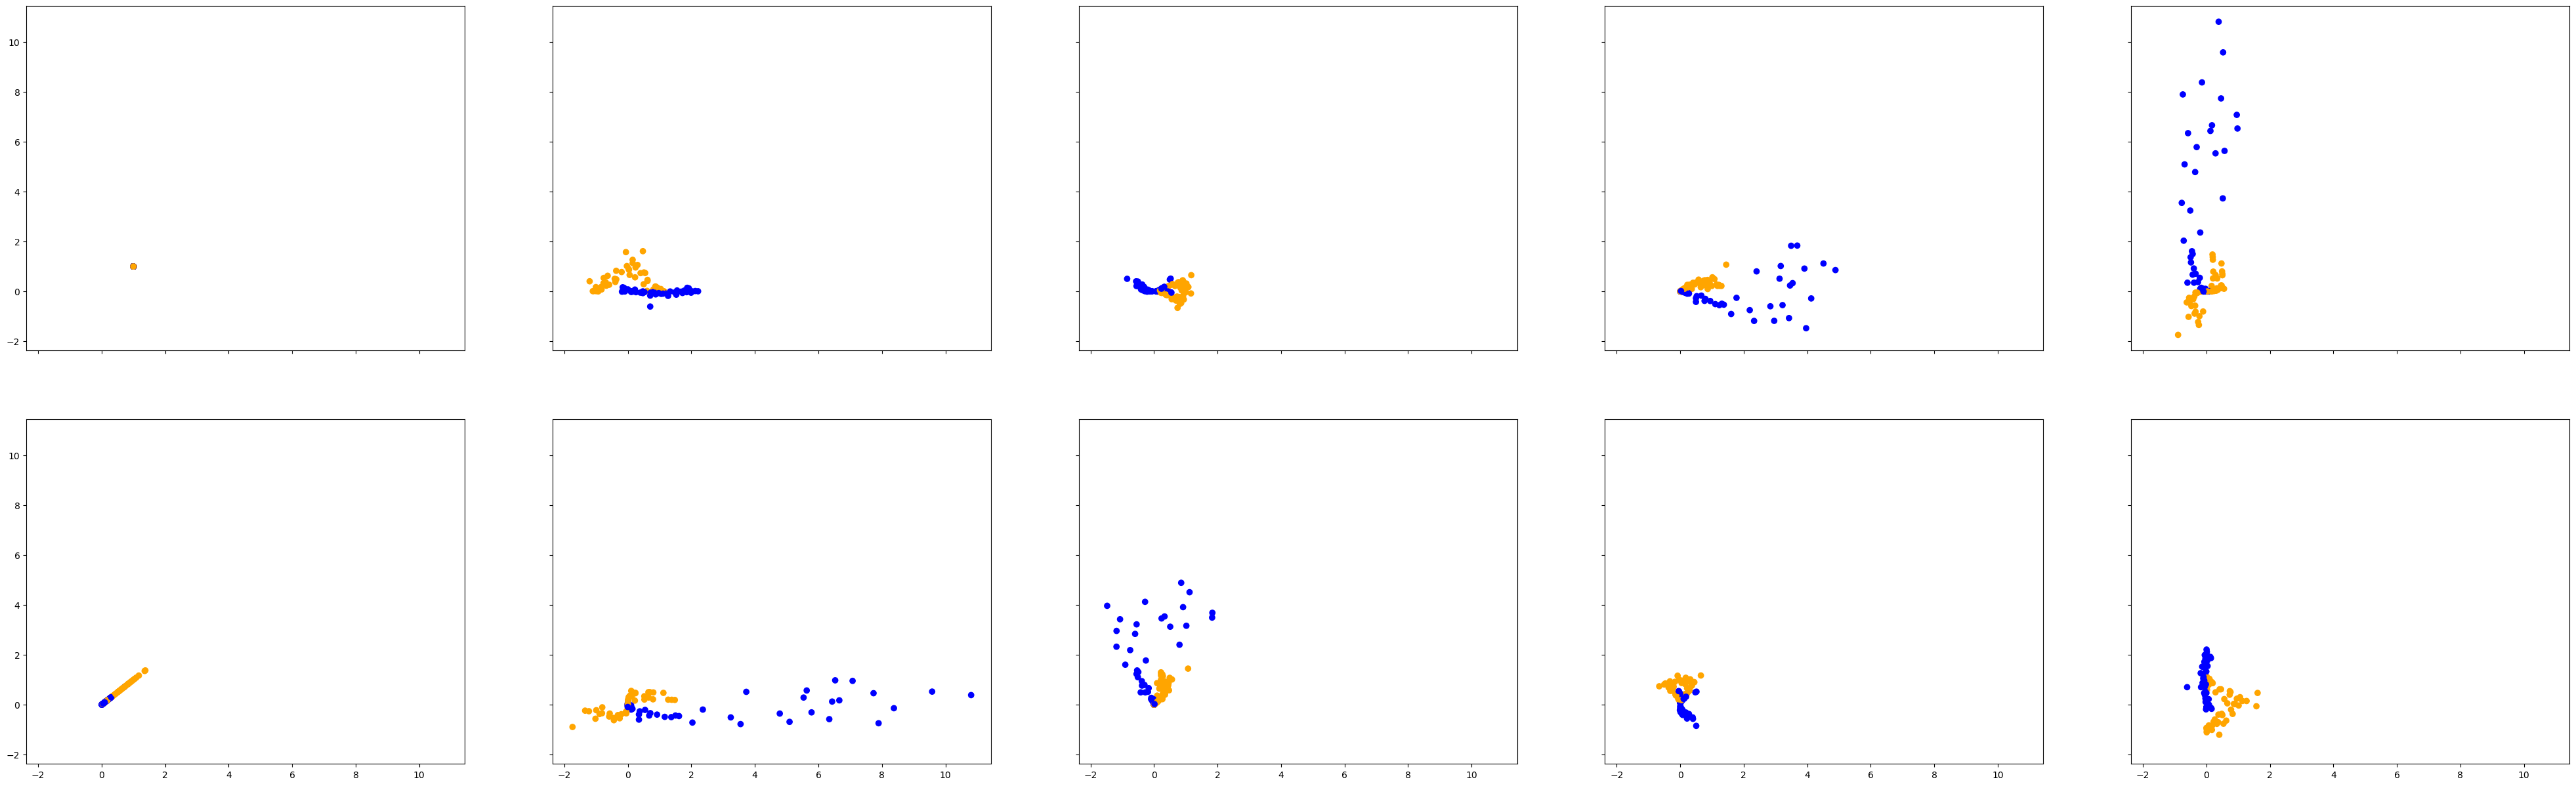

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True, sharex=True, figsize=(50, 15))#, subplot_kw=dict(projection='3d'))

n = 0
for row in ax:
    for col in row:
        col.scatter(poly_X[:, n], poly_X[:, -n], c=y, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))
        n += 1

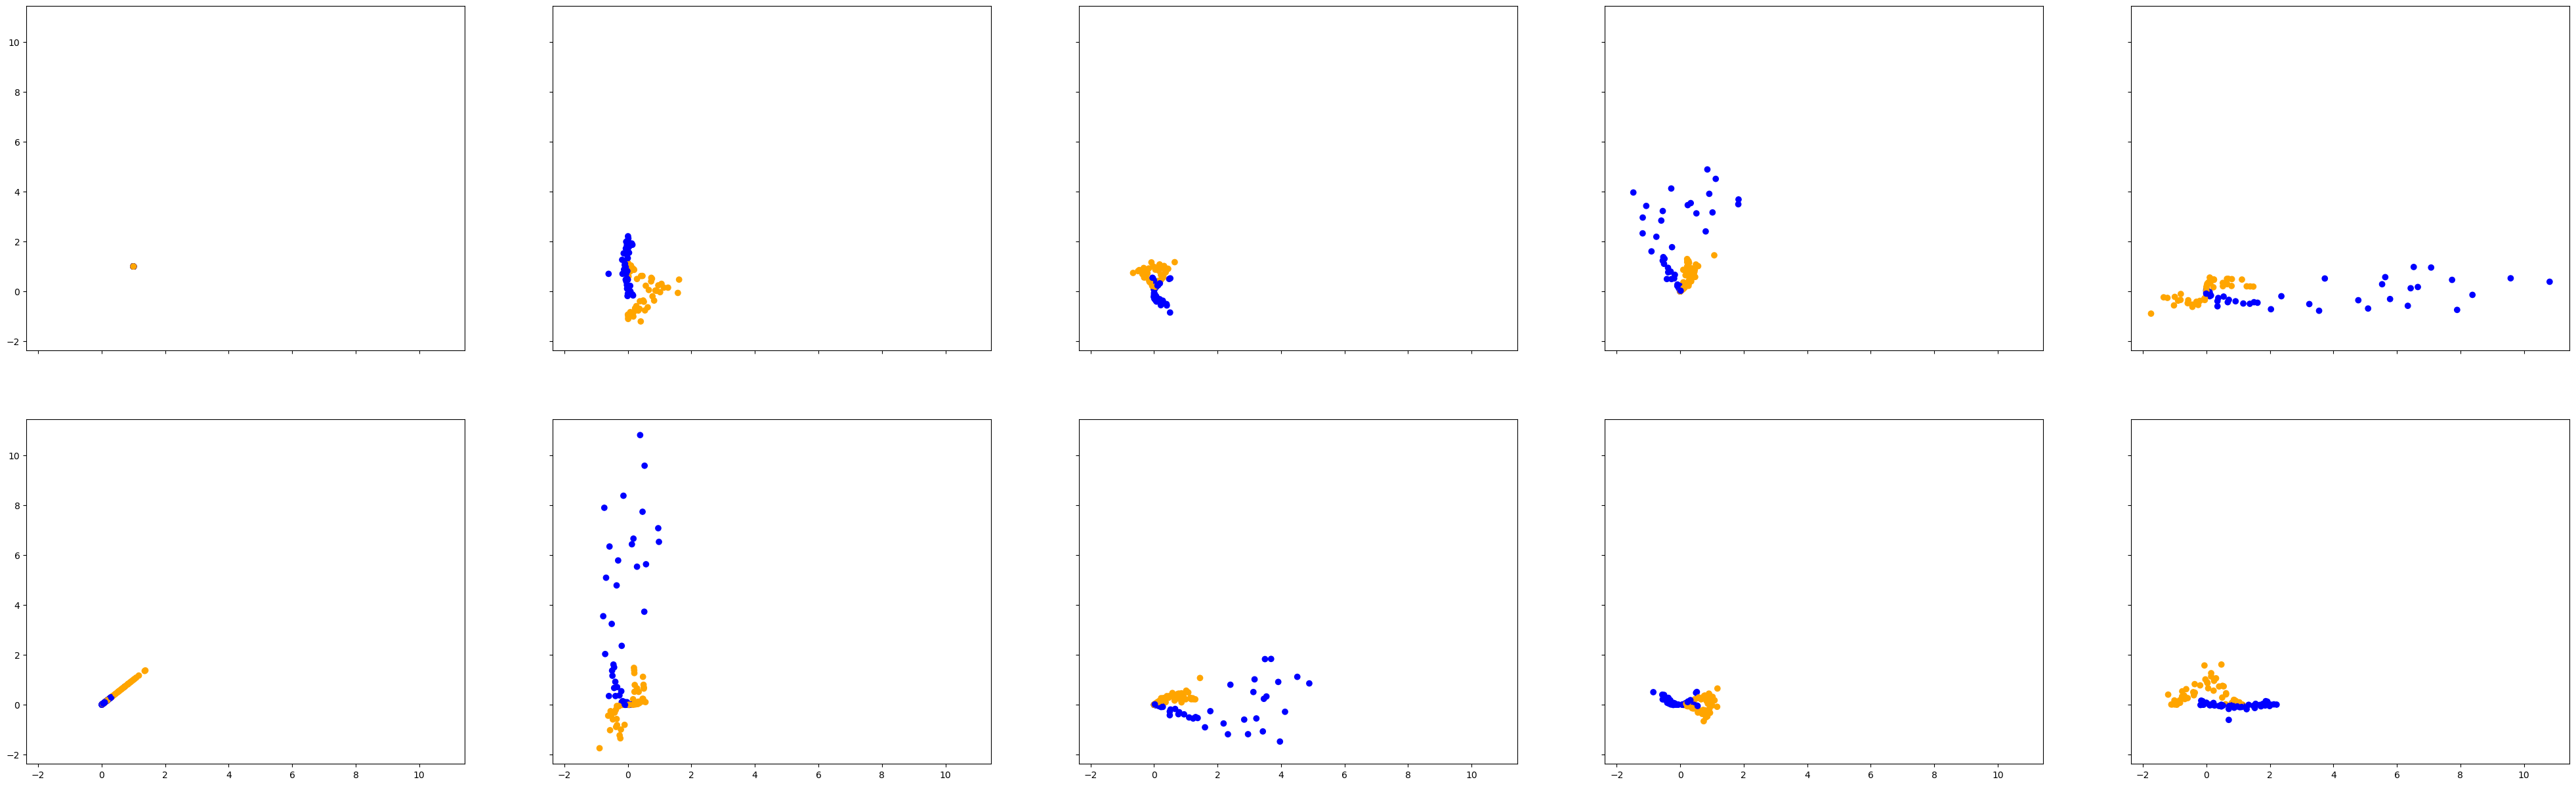

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True, sharex=True, figsize=(50, 15))#, subplot_kw=dict(projection='3d'))

n = 0
for row in ax:
    for col in row:
        col.scatter(poly_X[:, -n], poly_X[:, n], c=y, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))
        n += 1

In [12]:
polynomial_svm_clf_ = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))
])

polynomial_svm_clf_.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))])

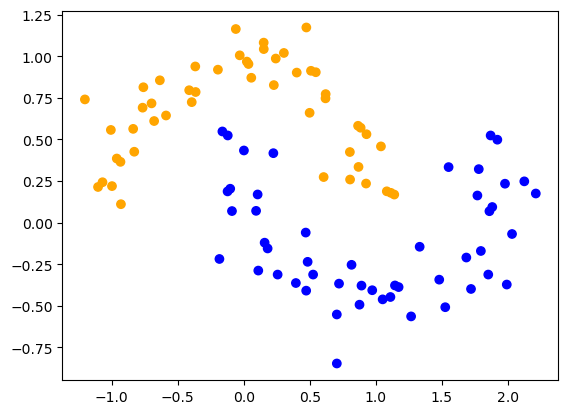

In [13]:
predictions = polynomial_svm_clf_.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

#### Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms.  That said, at a low polynomial degree, this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.  <br>

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the <i> kernel trick </i>.  The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them as features to the dataset. <br>

Obviously, if your model is overfitting, you might want to reduce the polynomial degree.  Conversely, if it is underfitting, you can try increasing it.  The hyperparameter coef0 controls how much the model is influenced by high-degree polynomials verses low-degree polynomials.  A common approach to finding the right hyperparameters is through the use of GridSearch (see Chapter 2).  It is often faster to first do a very coarse grid search, then a finer grid search around the best values found through the coarse search.

#### Example 3.0: Implementing the kernel trick

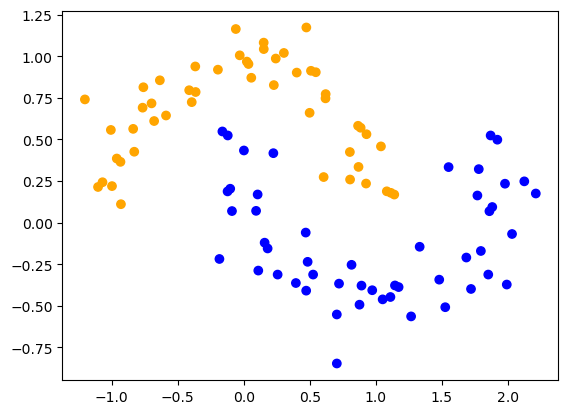

In [14]:
from sklearn.svm import SVC
poly_kernel_svm_clf_ = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf_.fit(X, y)
predictions = poly_kernel_svm_clf_.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

#### Similarity Features

Another technique to takcle nonlinear problems is to add features computed using a <i> simliarity function </i>, which measures how much each instance resembles a particular <i>landmark </i>. <br>

One simliarity function is the <b> Gaussian Radial Basis Function (RBF). </b> <br>

<center><u> Gaussian RBF </u></center>
$$\phi(x, \varphi) = \exp({-\gamma||x - \varphi||^{2}})$$ <br>

This is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).
$\gamma$ is a hyperparameter that increases (large $\gamma$) or decreases (small $\gamma$) how narrow the bell curve is.  If $\gamma$ is 0.3, $landmark_1$ = -2 and $landmark_2$ = 1 then the instance $x_1$ = -1 will be expanded into 2 new features: exp(-0.3 * $1^{2}$) and exp(-0.3 * $2^{2})$<br>

The simplest approach to choosing landmarks is to create a landmark at the location of each and every instance of the dataset.  The downside is that a training set with m instances and n features gets transformed into a trianing set with m instances and m features.  If your training set is very large, you end up with a massive amount of features. If this is too many features use some creative judgement in selecting as many landmarks as is realistic for the computer power / time effeciency constraints as hand and try to disperse these landmarks evenly among the dataset instances.

#### Gaussian RBF Kernel

Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features.  Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features.

#### Example 4.0: Implementing Gaussian RBF using the SMV kernel trick.

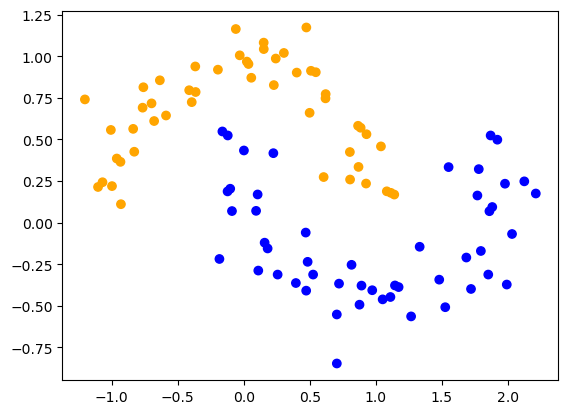

In [15]:
rbf_kernel_svm_clf_ = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf_.fit(X, y)
predictions = rbf_kernel_svm_clf_.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

Increasing gamma makes the bell-shaped curve narrower.  As a result, each instance's range of influence is smaller.  Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother.  So $\gamma$ acts like a regularization hyperparamter.  If your model is overfitting, you should reduce it; if it is underfitting you should increase it (similar to the C hyperparameter).  <br>

Other kernels exist but are used much more rarely.  Some kernels are specialized for specific data structures.  <i> String kernels </i> are sometimes used when classifying text documents or DNA sequences, for example. <br>

As a rule of thumb, you should always try the linear kernel first, especially if the training set is very large or if it has plenty of features.  If the training set is not too large, you should also try the Gaussian RBF kernel; it works well in most cases.  Then if you have spare time and computing power, you can experiment with a few other kernels.

#### Computational Complexity

The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs.  It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features.  Its training time complexity is roughly O(m x n).  The algorithm takes longer if you require very high precision, controlled by the tolerance hyperparameter $\varepsilon$.  <b>In most classification tasks, the default tolerance is fine</b>. <br>

The SVC class is based on the libsvm library that supports the kernel trick.  The training time complexity is usually between O($m^{2}$ x n) and O($m^{3}$ x n).  Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (hundreds of thousands of instances or more).  This algorithm is perfect for complex small or medium-sized training sets.

In [16]:
# Summarize the different SVM options and characteristics in a single table
import pandas as pd
table_data_ = {
    'LinearSVC': ['O(m x n)', 'No', 'Yes', 'No'],
    'SGDClassifier': ['O(m x n)', 'Yes', 'Yes', 'No'],
    'SVC': [u'O(m\u00b2 x n) to O(m\u00b3 x n)', 'No', 'Yes', 'Yes'],
}
table_columns_=['Class', 'Time Complexity', 'Out-of-core Support', 'Scaling Required', 'Kernel Tricket']
complexity_table_ = pd.DataFrame.from_dict(table_data_, orient='index').reset_index()
complexity_table_ = complexity_table_.rename(columns={k: v for k, v in zip(complexity_table_.columns, table_columns_)})
complexity_table_

,Class,Time Complexity,Out-of-core Support,Scaling Required,Kernel Tricket
0,LinearSVC,O(m x n),No,Yes,No
1,SGDClassifier,O(m x n),Yes,Yes,No
2,SVC,O(m² x n) to O(m³ x n),No,Yes,Yes


#### SVM Regression

As mentioned earlier, the SVM algorithm is versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression.  To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between tow classes while limiting the margin violations, SVM Regression tries to fit as many instances as possible <i> on </i> the street while limiting margin violations (instances off the street).  The width of the street is controlled by a hyperparameter $\varepsilon$. <br>

If addding more training instances within the margin does not affect the mode's predictions the model is said to be $\varepsilon$-insensitive.  <br>

You can use Scikit-Learn's LinearSVR class to perform linear SVM Regression.  The following code produces the model represnted on the left in Feigure 5-10 on page 163.

#### Example 5.0 Implementing SVM Regression


Oddly enough this does not produce what the textbook suggests it should. 
The dataset X is scaled and centered with StandardScaler but the output of the code provided is not the same as Figure 5-10.
The author might be using a different dataset for this example but forgot to include which dataset in the text.



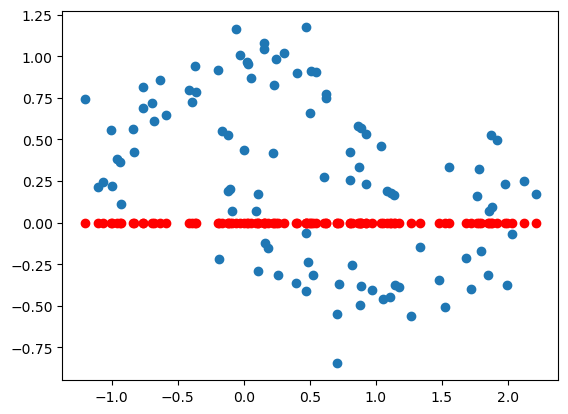

In [17]:
from sklearn.svm import LinearSVR

svm_reg_ = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_reg_', LinearSVR(epsilon=1.5))
])

svm_reg_.fit(X, y)
predictions = svm_reg_.predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], predictions, c='red')

print('''
Oddly enough this does not produce what the textbook suggests it should. 
The dataset X is scaled and centered with StandardScaler but the output of the code provided is not the same as Figure 5-10.
The author might be using a different dataset for this example but forgot to include which dataset in the text.
''')

To tackle non-linear regression tasks, you can use a kernelized SVM model.

#### Example 5.1: Implementing SMV Regression on Nonlinear Datasets


Again, this does not produce what the textbook suggests it should. 
The dataset X is scaled and centered with StandardScaler but the output of the code provided is not the same as Figure 5-10.
The author might be using a different dataset for this example but forgot to include which dataset in the text.



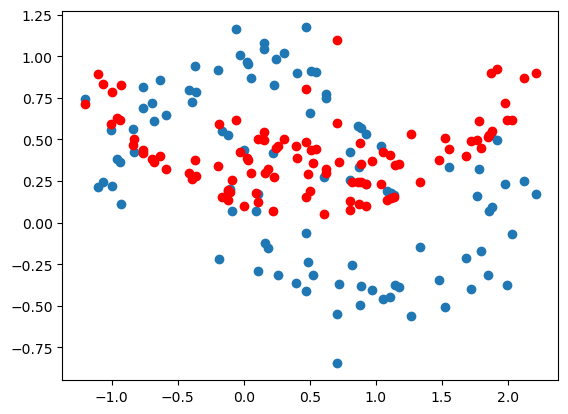

In [18]:
from sklearn.svm import SVR

svm_poly_reg_ = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_poly_reg_', SVR(kernel='poly', degree=2, C=100, epsilon=0.1))
])

svm_poly_reg_.fit(X, y)
predictions = svm_poly_reg_.predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], predictions, c='red')

print('''
Again, this does not produce what the textbook suggests it should. 
The dataset X is scaled and centered with StandardScaler but the output of the code provided is not the same as Figure 5-10.
The author might be using a different dataset for this example but forgot to include which dataset in the text.
''')

The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class.  <b>SVMs can also be used for outlier detection; see Scikit-Learn's documentations for more details</b>

#### Under the Hood

In this chapter we will use a convention that is more convenient (and more common) when dealing with SVMs: a bias term will be called <i> b </i> and the feature weights vector will be called <b> w </b>.  No bias feature will be added to the input feature vectors.  <br>

The linear SVM classifier model predicts the class of a new instance <b> x </b> by simply computing the decision function <b>$w^{T}$x</b> + b.  If the result is positive, the predicted class $\hat{y}$ is the positive class (1), otherwise it is the negative class (0) <br>

Training a linear SVM classifier means finding the values of <b> w </b> and <i> b </i> that make this margin as wide as possible while avoiding margin violations or limiting them.

#### Training Objective

The smaller the weight vector <b> w </b> the larger the margin.  So we want to minimize <b>$\lVert w \rVert$</b> to get a large margin.  If we also want to avoid any margin violations (hard margin), then we need the decision function to be greater than 1 for all positive training instances and lower than -1 for all negative training instances. This can be expressed with Equation 5-3 on page 166.  Note that optimization problems work much better on differentiable functions. <br>

To get the soft margin objective, we need to introduce a <i> slack variable </i>.  We now have two conflicting objectives: make the slack variables as small as possible to reduce the margin violations, and make <b>$\frac{1}{2}w^{T}$</b> as small as possible to increase the margin.  This is where the C hyperparameter comes in: it allows us to define the trade-off between these two objectives. This can be expressed through equation 5-4 on page 167.

#### Quadratic Programming

The hard margin and soft margin problems are both convex quadratic optimzation problems with linear constraints known as <i> Quadratic Programming </i> (QP) problems.  This is a specific topic with a large depth of subject matter. The textbook has a recommendation for further reading on page 167.

#### The Dual Problem

Given a constrained optimization problem, known as the <i> primal problem </i>, it is possible to express a different but closely related problem, called the <i> dual problem </i>.  Under some conditions the dual problem can have the same solution as the primal problem.  Luckily, the SVM problem happens to meet these conditions: <b>The objective function is convex and the inequality constraints are continuously differentiable and convex functions.</b>  So you can choose to solve the primal problem or the dual problem; both will have the same solution.  The dual problem is faster to solve than the primal one when the number of training instances is smaller than the number of features.  More importantly, the dual problem makes the kernel trick possible, while the primal does not.  So what is this kernel trick, anyway?

#### Kernelized SVMs

The function <i>K</i><b>(a, b)</b> = <b>$(a^{T}b)^{2}$</b> is a second-degree polynomial kernel.  In Machine Learning, a <i> kernel </i> is a function capable of computing the dot product $\phi(\mathbf{a})^{T}\phi(\mathbf{b})$ based only on the original vectors <b> a </b> and <b> b </b>, without having to compute (or even know about) the transformation $\phi$. For more information on kernels look into <b> Mercer's Theorem </b><br>

<center><u> Common kernels </u></center>
$$Linear: K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^{T}\mathbf{b}$$ <br>
$$Polynomial: K(\mathbf{a}, \mathbf{b}) = (\gamma\mathbf{a}^{T}\mathbf{b} + r)^{d}$$<br>
$$Gaussian RBF: K(\mathbf{a}, \mathbf{b}) = \exp(-\gamma\lVert\mathbf{a}-\mathbf{b}\rVert^{2})$$<br>
$$Sigmoid: K(\mathbf{a}, \mathbf{b}) = \tanh(\gamma\mathbf{a}^{T}\mathbf{b} + r)$$<br>

If you apply the kernel trick, you end up with equations that include $\phi(x^{i})$. In fact, <b>$\hat{w}$</b> must have the same number of dimensions as $\phi(x^{i})$ which may be huge or even infinite.  How can you make predictions without knowing <b>$\hat{w}$</b>? You can plug the formula for <b>$\hat{w}$</b> from Equation 5-7 on page 169 into the decision function for a new instances <b>$x^{n}$</b>, and you get an equation with only dot products between input vectors.  This makes it possible to use the kernel trick.<br>

It is also possible to implement online kernelized SVMs.  These kernelized SVMs are implemented in Matlab and C++.  For larger scale nonlinear problems, you may want to consider using neural networks instead.

#### Exercises

<b>1. What is the fundamental idea behind Support Vector Machines? </b>

My answer: <br>

Depending on whether you are running a classification or regression you want to either minimize or maximize an upper and lower bound between the targets (commonly visualized as a street). For classification you want to fit the widest possible street between the 2 classes as possible while minimizing the margin violations; instances on the supoport vector or on the wrong side.  For regression, the opposite holds.  You want to fit the narrowest possible street between the targets as possible while maximizing the instances on the support vector.

Book answer: <br>

The fundamental idea behind Support Vector Machines is to fit the widest possible "street" between the classes.  In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances.  When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e, a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets.

<b>2. What is a support vector?<b>

My answer:

The support vector for any SVM is fully determined by the instances which lie on the decision boundary (the edge of the street).

Book answer: <br>

After training an SVM, a support vector is any instance located on the "street", including the border.  The decision boundary is entirely determined by support vectors.  Any instance that is not a support vector has no influence on the decision boundary.  Computing the predictions only involves the support vectors, not the whole training set.

<b>3. Why is it important to scale the inputs when using SVMs?</b>

My answer:

In general for Machine Learning models scaling the features yields better results.  In the case of SVMs it is important to scale because the bias term is regularized and failing to center the training data will skew results.  Moreso, failing to scale features can result in horizontal or vertical decision boundaries which might have limited predictive ability.

Book answer:

SVMs try to fit the largest possible "street" between the classes so if the training set is not scaled, the SVM will tend to neglect small features.

<b>4. Can an SVM classifier output a confidence score when it classifies an instance?  What about a probability?</b>

My answer:

A confidence score and a probability are basically the same thing.  And no, SVMs do not produce confidence scores.  Predictions are 1 or 0 only.

Book answer:

An SVM classifier can output the distance between the test instance and hte decision boundary, and you can use this as a confidence score.  However, this score cannot be directly converted into an estimation of the class probability.  If you set probability=True when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM's scores (trained by an additional five-fold cross-validation on the training data).  This will add the predict_proba() and predict_log_proba() methods to the SVM

<b>5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?</b>

My answer:

Since this example is a problem with more training instances than features the primal form should be used.

Book answer:

This question applies only to linear SVMs since kernelized SVMs can only use the dual form.  The computational complexity of the primal form of the SVM problem is proportional to the number of instances <i>m</i> while the computational complexity of the dual form is proportional to a number between <i>$m^{2}$</i> and <i>$m^{3}$</i>.  So, if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow.

<b>6. Say you've trained an SVM classifier with an RBF kernel, but it seems to underfit the training set.  Should you increase or decrease $\gamma$?  What about C?

My answer:

Both $\gamma$ and C have the characteristic that when the model is underfitting, you can increase these hyperparameters for better results.  Likewise, when the model is overfitting, you can reduce these hyperparamaters for better results.

Book answer:

If an SVM classifer trained with an RBF kernel underfit the training set, there might be too much regularization.  To decrease it, you need to increase $\gamma$, C, or both.

<b>7. How should you set the QP parameters (H, f, A and b) to solve the soft marginlinear SVM classifer problem using an off-the-shelf QP solver?

My answer:

Quadradic Programming is a mathematically complicated topic and the book mentions that SVM hard and soft margin objectives are only a subset of QP.  I currently have little interest in these and so will skip this problem.  In the future if I desire to learn more I will begin with the referneces suggested on page 167

<b>8. Train a LinearSVC on a linearly separable dataset.  Then train an SVC and a SGDClassifier on the same dataset.  See if you can get them to produce roughly the same model.

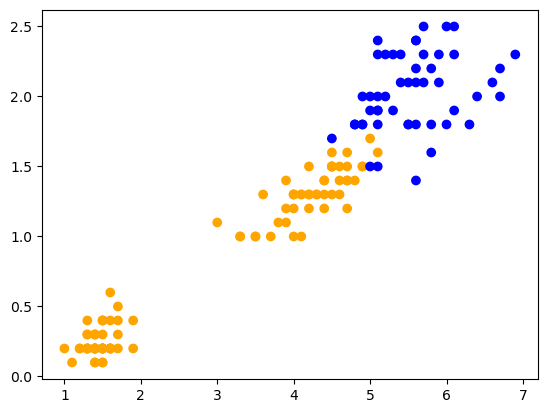

In [19]:
# We'll use the dataset from the beginning of the chapter.
X = iris.get('data')[:, (2,3)]
y = (iris.get('target') == 2).astype(np.float64) 

# Check that is it linearly separable
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

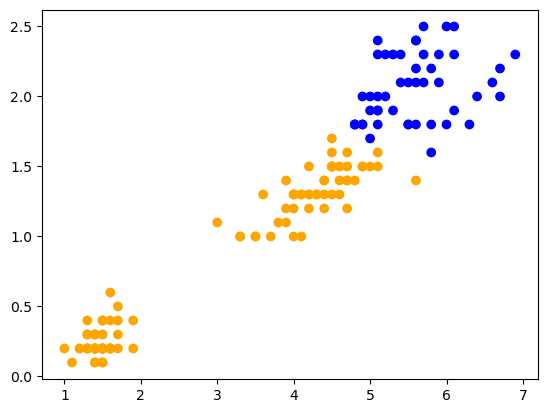

In [20]:
# LinearSVC
svm_clf_ = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf_.fit(X, y)

predictions = svm_clf_.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

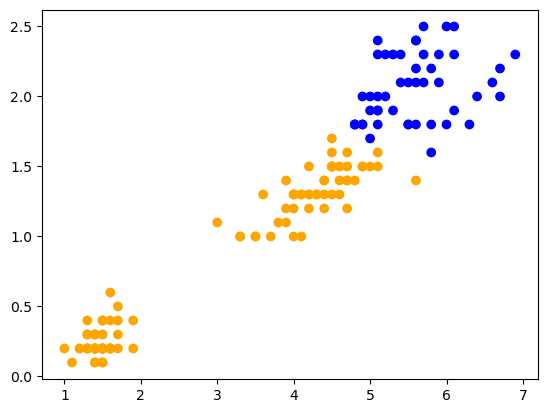

In [21]:
# SVC
rbf_kernel_svm_clf_ = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='linear', gamma=5, C=0.1))
])

rbf_kernel_svm_clf_.fit(X, y)
predictions = rbf_kernel_svm_clf_.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

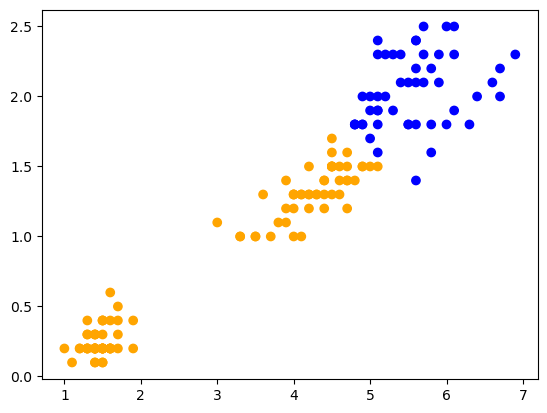

In [22]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf_ = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(epsilon=0.005, alpha=0.005))
])

sgd_clf_.fit(X, y)
predictions = sgd_clf_.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=matplotlib.colors.ListedColormap(['orange', 'blue']))

<b>9. Train an SVM classifier on the MNIST dataset.  Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validations sets to speed up the process.  What accuracy can you reach?

In [23]:
# Load the dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
X.shape, y.shape

((70000, 784), (70000,))

#### Deskewing

When we write, we often write at angles to the paper, which cause letters and numbers to be skewed.  Unfortunuately, unlike the human eye, computers cannot easily find simliarities between images that are transformations of each other.  Thus, the process of <i> deskewing </i>.

Very formally, <b> deskewing </b> is the process of straightening an image that has been scanned or written crookedly -- that is an image that is slanting too far in one direction, or one that is misaligned.

In particular, we model the process of deskewing as an affine transformation.  We assume that when the image was created (the skewed version), it is actually some affine skew transformation of the image $Image\prime = A(Image) + b$ which we do not know.  What we do know is that we want the enter of mass to be the center of the image, and that we'd like to know the angle at which it was skewed.

The methodology goes as follow:
    1. Find the center of mass of the image to figure out how much we need to offset the image
    2. Find the covariance matrix of the image pixel intensities (we can use this to approximate the skew of the angle).
    
The function <b> moments </b> below, calculates these relevant quantities.

Next, we'd like to calculate the matrix which will allow us to skew 'back' to the original image.  This is given by the following formula:

$$\begin{bmatrix}1 & 1\\ \alpha & 1\end{bmatrix} \mspace{36mu} where \mspace{18mu} \alpha = \frac{Cov(X, Y)}{Var(X)}$$

Furthermore, we have an offset of $\mu$−center

Thus, combining the two, using the handy interpolation library from scipy, we complete the method deskew below.

https://fsix.github.io/mnist/Deskewing.html

In [24]:
from scipy.ndimage import affine_transform

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    image = image.reshape(28, 28)
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return affine_transform(image,affine,offset=offset)

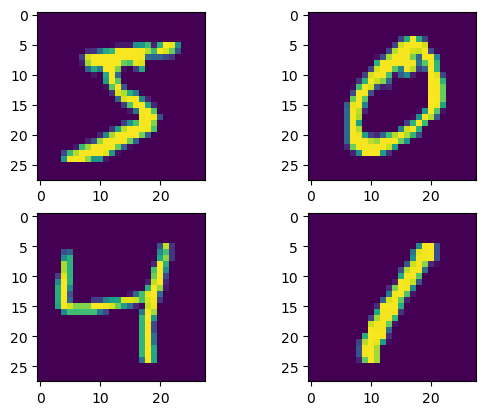

In [25]:
# Original images
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X[0].reshape(28,28))
ax[0][1].imshow(X[1].reshape(28,28))
ax[1][0].imshow(X[2].reshape(28,28))
ax[1][1].imshow(X[3].reshape(28,28))

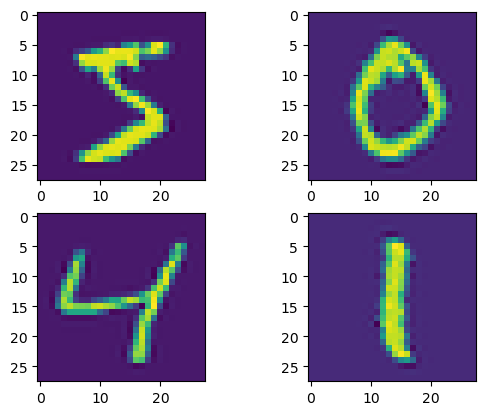

In [26]:
# Deskewed images
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(deskew(X[0]))
ax[0][1].imshow(deskew(X[1]))
ax[1][0].imshow(deskew(X[2]))
ax[1][1].imshow(deskew(X[3]))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create training, validation, and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [28]:
from scipy.ndimage import shift

class DeSkewMinMaxScaler(MinMaxScaler):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def transform(self, X, y=None):
        deskewed_X = np.apply_along_axis(self.deskew, 1, X)
        transformed_X = super().transform(deskewed_X)
        return transformed_X

    def moments(self, image):
        c0, c1 = np.mgrid[:image.shape[0], :image.shape[1]] # A trick in numPy to create a mesh grid
        totalImage = np.sum(image) #sum of pixels
        m0 = np.sum(c0 * image) / totalImage #mu_x
        m1 = np.sum(c1 * image) / totalImage #mu_y
        m00 = np.sum((c0 - m0) **2 * image) / totalImage #var(x)
        m11 = np.sum((c1  -m1) **2 * image) / totalImage #var(y)
        m01 = np.sum((c0 - m0) * (c1 - m1) * image) / totalImage #covariance(x,y)
        mu_vector = np.array([m0, m1]) # Notice that these are \mu_x, \mu_y respectively
        covariance_matrix = np.array([[m00, m01],[m01, m11]]) # Do you see a similarity between the covariance matrix
        return mu_vector, covariance_matrix

    def deskew(self, image):
        image = image.reshape(28, 28)
        c,v = moments(image)
        alpha = v[0, 1] / v[0, 0]
        affine = np.array([[1,0], [alpha,1]])
        ocenter = np.array(image.shape) / 2.0
        offset = c - np.dot(affine, ocenter)
        return affine_transform(image, affine, offset=offset).flatten()

In [29]:
from sklearn.metrics import accuracy_score

mnist_clf_ = Pipeline([
    ('minmax', DeSkewMinMaxScaler()),
    ('svm_clf', SVC(kernel='linear', gamma=0.1, C=0.1))
])

mnist_clf_.fit(X_train, y_train)
predicted = mnist_clf_.predict(X_val)
print (accuracy_score(y_val, predicted))

0.9664705882352941


In [30]:
mnist_clf_ = Pipeline([
    ('minmax', DeSkewMinMaxScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=10, C=5))
])

mnist_clf_.fit(X_train, y_train)
predicted = mnist_clf_.predict(X_val)
print (accuracy_score(y_val, predicted))

0.23134453781512604


In [31]:
# Re-define the training and test set to exclude the validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train.shape, y_train.shape

((59500, 784), (59500,))

In [37]:
# from sklearn.model_selection import GridSearchCV

# # Optimize hyperparameters
# mnist_clf_ = Pipeline([
#     ('minmax', DeSkewMinMaxScaler()),
#     ('svm_clf', SVC(kernel='linear', gamma=0.1, C=0.1))
# ])

# param_grid = [
#     {'svm_clf__kernel': ['linear'], 'svm_clf__gamma': [0.001, 0.005, 0.01], 'svm_clf__C': [0.001, 0.005, 0.01]}
# ]

# optimized_svm_clf = GridSearchCV(estimator=mnist_clf_, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs= -1, verbose=3)
# optimized_svm_clf.fit(X_train, y_train)

# best_params_ = {parameter.replace('svm_clf__', ''): value for parameter, value in optimized_svm_clf.best_params_.items()}

# # Then feed into a new Pipeline
# mnist_clf_ = Pipeline([
#     ('minmax', DeSkewMinMaxScaler()),
#     ('svm_clf', SVC(**best_params_))
# ])

# # You can go further and apply PCA and other dimensionality reduction or feature engieering techniques but this sufficiently answers this question.
# mnist_clf_.fit(X_train, y_train)
# predicted = mnist_clf_.predict(X_test)
# print (accuracy_score(y_test, predicted))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9654285714285714


Fitting 5 folds for each of 9 candidates, totalling 45 fits

0.9654285714285714

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

<b>10. Train an SVM regressor on the California housing dataset</b>

In [40]:
import os
housing_data_ = pd.read_csv(os.getcwd() + '/housing.csv')

In [41]:
housing_data_.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [42]:
housing_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
housing_data_.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [44]:
housing_data_.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

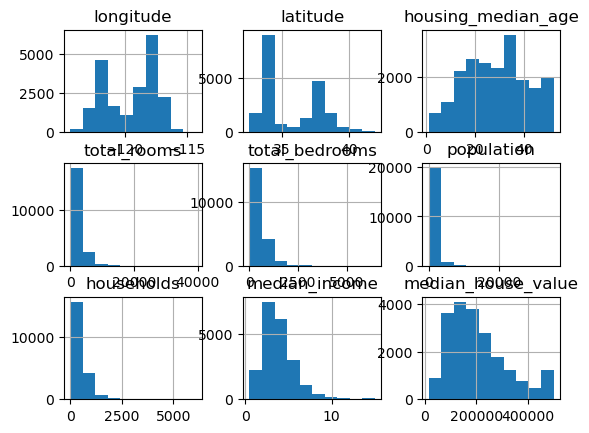

In [145]:
housing_data_.hist()

In [159]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [106]:
# Initial data cleanup

# Get one hot encoding of ocean_proximity
one_hot = pd.get_dummies(housing_data_.loc[:, ['ocean_proximity']])
clean_housing_data_ = housing_data_.join(one_hot)
clean_housing_data_.columns = clean_housing_data_.columns.str.replace('ocean_proximity_', '').str.lower()

# Add some feature ratios
clean_housing_data_.loc[:, 'bedroom_density'] = clean_housing_data_.total_bedrooms.div(clean_housing_data_.total_rooms)
clean_housing_data_.loc[:, 'households_density'] = clean_housing_data_.households.div(clean_housing_data_.population)
clean_housing_data_.loc[:, 'income_to_age'] = clean_housing_data_.median_income.div(clean_housing_data_.housing_median_age)

# Map age and income to generalized buckets
clean_housing_data_['housing_median_age'] = pd.qcut(clean_housing_data_.loc[:, 'housing_median_age'], q=np.linspace(0, 1, 5), labels=False)
clean_housing_data_['median_income'] = pd.qcut(clean_housing_data_.loc[:, 'median_income'], q=np.linspace(0, 1, 5), labels=False)
clean_housing_data_['income_to_age'] = pd.qcut(clean_housing_data_.loc[:, 'income_to_age'], q=np.linspace(0, 1, 5), labels=False)

# Drop geographical coordinates and redundant columns
clean_housing_data_ = clean_housing_data_.drop(columns=['longitude', 'latitude', 'ocean_proximity', 'total_bedrooms', 'households', 
                                                        'total_rooms', 'population', 'median_income', 'housing_median_age']).copy()

# Drop rows which don't contain data for all features
clean_housing_data_ = clean_housing_data_.dropna()

clean_housing_data_

,median_house_value,<1h ocean,inland,island,near bay,near ocean,bedroom_density,households_density,income_to_age
0,452600.0,0,0,0,1,0,0.146591,0.391304,2
1,358500.0,0,0,0,1,0,0.155797,0.473969,3
2,352100.0,0,0,0,1,0,0.129516,0.356855,2
3,341300.0,0,0,0,1,0,0.184458,0.392473,1
4,342200.0,0,0,0,1,0,0.172096,0.458407,0
...,...,...,...,...,...,...,...,...,...
20635,78100.0,0,1,0,0,0,0.224625,0.390533,0
20636,77100.0,0,1,0,0,0,0.215208,0.320225,2
20637,92300.0,0,1,0,0,0,0.215173,0.429990,1
20638,84700.0,0,1,0,0,0,0.219892,0.470985,1


In [108]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the target
clean_housing_targets_ = clean_housing_data_.loc[:, 'median_house_value']
clean_housing_features_ = clean_housing_data_.drop(columns=['median_house_value'])

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(clean_housing_features_, clean_housing_targets_, test_size=0.10, random_state=42, stratify=clean_housing_features_['income_to_age'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=X_train['income_to_age'])

In [109]:
# Check stratification
X_test.loc[:, 'income_to_age'].value_counts() / X_test.shape[0]

2    0.250489
3    0.250000
0    0.250000
1    0.249511
Name: income_to_age, dtype: float64

221473.40939150125


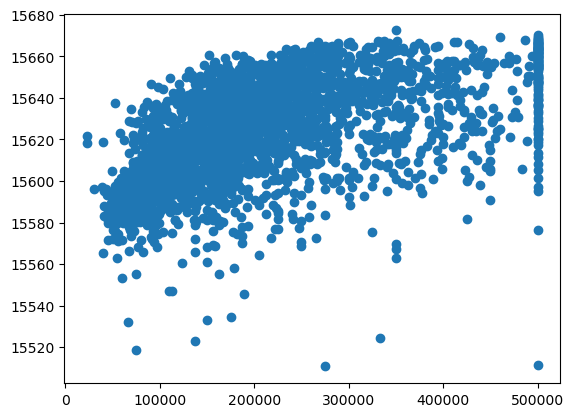

In [114]:
# Create a pipeline
from sklearn.metrics import mean_squared_error
svm_reg_ = Pipeline([
    # ('scaler', MinMaxScaler()),
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR(epsilon=100))
])

svm_reg_.fit(X_train, y_train)
predictions_ = svm_reg_.predict(X_val)

print(np.sqrt(mean_squared_error(y_val, predictions_)))

fig, ax = plt.subplots()
ax.scatter(x=y_val, y=predictions_)

In [132]:
from sklearn.decomposition import PCA

# Optimize hyperparameters
svm_reg = Pipeline([
    ('pca', PCA()),
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR())
])

param_grid = [
    {
        'pca__n_components': np.linspace(0.1, 0.99, 100), 
        'svm_reg__epsilon': np.linspace(1, 5, 50), 
        'svm_reg__C': np.linspace(1, 100, 100)
    }
]

optimized_svm_reg_ = GridSearchCV(estimator=svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs= -3, verbose=1)
optimized_svm_reg_.fit(X_train, y_train)

best_params_ = {parameter.replace('svm_reg__', '').replace('pca__', ''): value for parameter, value in optimized_svm_reg_.best_params_.items()}

C:\Users\Steph\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4000 fits failed out of a total of 400000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Steph\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Steph\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Steph\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 507, in fit
    self._validate_params()
  File "C:\Users\Steph\anacon

In [142]:
best_params_ = {parameter.replace('svm_reg__', '').replace('pca__', ''): value for parameter, value in optimized_svm_reg_.best_params_.items()}
pca_best_params_ = {'n_components': best_params_.pop('n_components')}
best_params_, pca_best_params_

({'C': 20.0, 'epsilon': 2.6270000000000002, 'fit_intercept': True},
 {'n_components': None})

108947.73336286878


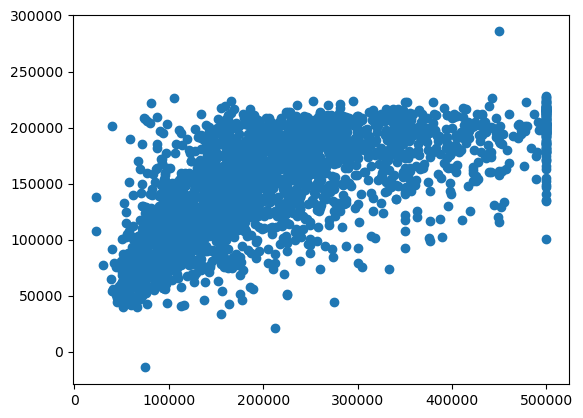

In [144]:
# Then feed into a new Pipeline
svm_reg_ = Pipeline([
    ('pca', PCA(**pca_best_params_)),
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR(**best_params_))
])

svm_reg_.fit(X_train, y_train)
predictions_ = svm_reg_.predict(X_val)

print(np.sqrt(mean_squared_error(y_val, predictions_)))

fig, ax = plt.subplots()
ax.scatter(x=y_val, y=predictions_)

The exercise in chapter 1 was able to get the MSE to about 50k.  So this model significantly underperforms that model. Lets try to tweak some things to get a better output. 

In [157]:
feature_importances = optimized_svm_reg_.best_estimator_._final_estimator.coef_
feature_names = optimized_svm_reg_.best_estimator_.feature_names_in_
feature_weights = sorted(zip(feature_importances, feature_names))
feature_weights

[(-30105.45702454076, 'inland'),
 (-23510.869120643445, '<1h ocean'),
 (-12192.426715672918, 'bedroom_density'),
 (852.4072714461183, 'income_to_age'),
 (2595.857679912686, 'households_density'),
 (5223.026558969471, 'near bay'),
 (8408.853920325908, 'near ocean'),
 (15537.196743900246, 'island')]

In [172]:
housing_data_.shape

(20640, 10)

<Axes: >

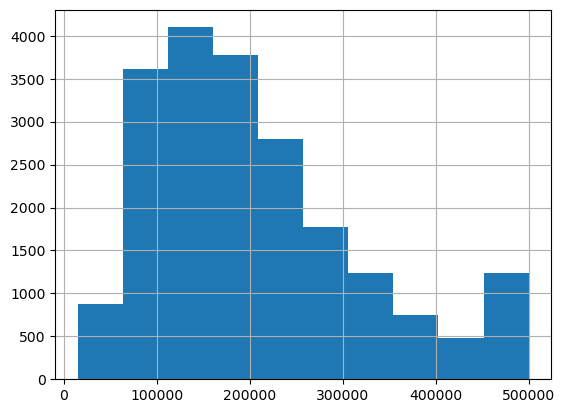

In [166]:
housing_data_.median_house_value.hist()

In [167]:
housing_data_.median_house_value.max()

500001.0

In [171]:
# Revisited data cleanup

# Get one hot encoding of ocean_proximity
one_hot = pd.get_dummies(housing_data_.loc[:, ['ocean_proximity']])
clean_housing_data_ = housing_data_.join(one_hot)
clean_housing_data_.columns = clean_housing_data_.columns.str.replace('ocean_proximity_', '').str.lower()

# Add some feature ratios
clean_housing_data_.loc[:, 'bedroom_density'] = clean_housing_data_.total_bedrooms.div(clean_housing_data_.total_rooms)
clean_housing_data_.loc[:, 'households_density'] = clean_housing_data_.households.div(clean_housing_data_.population)
clean_housing_data_.loc[:, 'income_to_age'] = clean_housing_data_.median_income.div(clean_housing_data_.housing_median_age)

# Map age and income to generalized buckets.  Expand this into more granular buckets than before
clean_housing_data_['housing_median_age'] = pd.qcut(clean_housing_data_.loc[:, 'housing_median_age'], q=np.linspace(0, 1, 7), labels=False)
clean_housing_data_['median_income'] = pd.qcut(clean_housing_data_.loc[:, 'median_income'], q=np.linspace(0, 1, 7), labels=False)
clean_housing_data_['income_to_age'] = pd.qcut(clean_housing_data_.loc[:, 'income_to_age'], q=np.linspace(0, 1, 7), labels=False)

# Drop geographical coordinates and redundant columns
clean_housing_data_ = clean_housing_data_.drop(columns=['longitude', 'latitude', 'ocean_proximity', 'total_bedrooms', 'households', 
                                                        'total_rooms', 'population', 'median_income', 'housing_median_age']).copy()

# Drop rows which don't contain data for all features
clean_housing_data_ = clean_housing_data_.dropna()

# There's oddity at 500,000 median_house_value. Drop any values at or above this value
clean_housing_data_ = clean_housing_data_.query('median_house_value < 500000').copy()

clean_housing_data_

,median_house_value,<1h ocean,inland,island,near bay,near ocean,bedroom_density,households_density,income_to_age
0,452600.0,0,0,0,1,0,0.146591,0.391304,4
1,358500.0,0,0,0,1,0,0.155797,0.473969,5
2,352100.0,0,0,0,1,0,0.129516,0.356855,3
3,341300.0,0,0,0,1,0,0.184458,0.392473,2
4,342200.0,0,0,0,1,0,0.172096,0.458407,1
...,...,...,...,...,...,...,...,...,...
20635,78100.0,0,1,0,0,0,0.224625,0.390533,0
20636,77100.0,0,1,0,0,0,0.215208,0.320225,3
20637,92300.0,0,1,0,0,0,0.215173,0.429990,2
20638,84700.0,0,1,0,0,0,0.219892,0.470985,2


In [173]:
# Define the target
clean_housing_targets_ = clean_housing_data_.loc[:, 'median_house_value']
clean_housing_features_ = clean_housing_data_.drop(columns=['median_house_value'])

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(clean_housing_features_, clean_housing_targets_, test_size=0.10, random_state=42, stratify=clean_housing_features_['income_to_age'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=X_train['income_to_age'])

In [174]:
# Check stratification
X_test.loc[:, 'income_to_age'].value_counts() / X_test.shape[0]

0    0.173265
1    0.171208
2    0.170180
3    0.167095
4    0.160925
5    0.157326
Name: income_to_age, dtype: float64

90386.92502133411


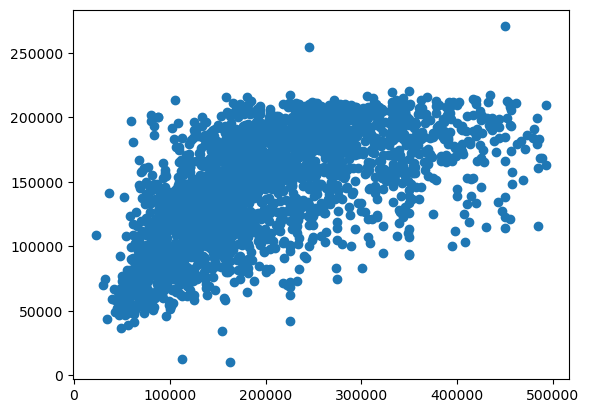

In [176]:
# Create a pipeline
from sklearn.metrics import mean_squared_error
svm_reg_ = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR(**{'C': 20.0, 'epsilon': 2.6270000000000002, 'fit_intercept': True}))
])

svm_reg_.fit(X_train, y_train)
predictions_ = svm_reg_.predict(X_val)

print(np.sqrt(mean_squared_error(y_val, predictions_)))

fig, ax = plt.subplots()
ax.scatter(x=y_val, y=predictions_)

Much better.  Lets optimize again and see how it performs on the test set

Fitting 5 folds for each of 500000 candidates, totalling 2500000 fits


C:\Users\Steph\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


81048.29973595614


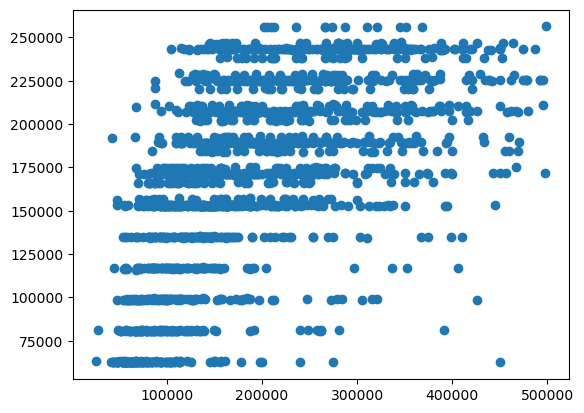

In [179]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(clean_housing_features_, clean_housing_targets_, test_size=0.10, random_state=42, stratify=clean_housing_features_['income_to_age'])

# Optimize hyperparameters
svm_reg = Pipeline([
    ('pca', PCA()),
    ('scaler', StandardScaler()),
    ('svm_reg', LinearSVR())
])

param_grid = [
    {
        'pca__n_components': np.linspace(0.1, 0.99, 100), 
        'svm_reg__epsilon': np.linspace(1, 5, 50), 
        'svm_reg__C': np.linspace(1, 100, 100)
    }
]

optimized_svm_reg_ = GridSearchCV(estimator=svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs= -2, verbose=1)
optimized_svm_reg_.fit(X_train, y_train)

# Separate the best paramaters to their respective class
best_params_ = {parameter.replace('svm_reg__', '').replace('pca__', ''): value for parameter, value in optimized_svm_reg_.best_params_.items()}
pca_best_params_ = {'n_components': best_params_.pop('n_components')}

Still worse than the random forest from chapter 1, but at least the error is in the same order of magnitude now.